* Deletions
* HG002 Only
* Technology: MP

* The following classifier will train on and predict the following labels:
    - GTcons
    
* All -1 values have been removed from the train and test set

In [1]:
"""
Imports
"""
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



In [2]:
# Import Training Data
# SVanalyzer generated training data
df_train = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/train/tech_sep/DEL/no_minus_one/IllMP_HG002_no-1_DEL.csv')
df_train_2 = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/train/tech_sep/DEL/no_minus_one/IllMP_HG002_no-1_DEL.csv')
df_train.rename(columns={'size': 'Size'}, inplace=True)
df_train.head(1)

,chrom,id,sample,start,end,type,SVtype,Size,refN_cnt,refN_pct,...,IllMP.amb_reason_orientation_orientation,IllMP.amb_reason_same_scores,IllMP.ref_alnScore_mean,IllMP.ref_alnScore_std,IllMP.ref_count,IllMP.ref_insertSize_mean,IllMP.ref_insertSize_std,IllMP.ref_reason_alignmentScore,IllMP.ref_reason_insertSizeScore,IllMP.ref_reason_orientation
0,1,39,HG002,109690878,109690918,Insertion,Deletion,-39,0,0,...,35.0,396.0,474.0,40.447497,4.0,7461.0,757.261514,3.0,0.0,1.0


In [3]:
# Import Test Data
# SVanalyzer generated training data
df_test = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/test/tech_sep/DEL/no_minus_one/IllMP_HG002_no-1_DEL.csv')
df_test_2 = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/test/tech_sep/DEL/no_minus_one/IllMP_HG002_no-1_DEL.csv')
df_test.rename(columns={'size': 'Size'}, inplace=True)
df_test.head(1)

,chrom,id,sample,start,end,type,SVtype,Size,refN_cnt,refN_pct,...,IllMP.amb_reason_orientation_orientation,IllMP.amb_reason_same_scores,IllMP.ref_alnScore_mean,IllMP.ref_alnScore_std,IllMP.ref_count,IllMP.ref_insertSize_mean,IllMP.ref_insertSize_std,IllMP.ref_reason_alignmentScore,IllMP.ref_reason_insertSizeScore,IllMP.ref_reason_orientation
0,4,1,HG002,95498964,95499280,Deletion,Deletion,-316,0,0,...,33.0,416.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Store header names in lists and find names that are NOT contained in BOTH lists
c = list(df_train.columns.values)
d = list(df_test.columns.values)
set(c) - set(d)

{'Label'}

In [5]:
### Drop columns that are not shared by both dataframes
df_train.drop(['Label'], axis=1, inplace = True)
df_train.drop(['GTconflict'], axis=1, inplace = True)
df_train.drop(['GTsupp'], axis=1, inplace = True)
df_train.drop(['sample'], axis=1, inplace = True)
df_train.drop(['SVtype'], axis=1, inplace = True)
df_train.drop(['type'], axis=1, inplace = True)
df_train.drop(['id'], axis=1, inplace = True)

In [6]:
df_train.head(1)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,IllMP.amb_reason_orientation_orientation,IllMP.amb_reason_same_scores,IllMP.ref_alnScore_mean,IllMP.ref_alnScore_std,IllMP.ref_count,IllMP.ref_insertSize_mean,IllMP.ref_insertSize_std,IllMP.ref_reason_alignmentScore,IllMP.ref_reason_insertSizeScore,IllMP.ref_reason_orientation
0,1,109690878,109690918,-39,0,0,0,0.0,1,0.4,...,35.0,396.0,474.0,40.447497,4.0,7461.0,757.261514,3.0,0.0,1.0


In [7]:
df_train['chrom'].replace('X', 23, inplace=True)
df_train['chrom'].replace('Y', 24, inplace=True)
df_test['chrom'].replace('X', 23, inplace=True)
df_test['chrom'].replace('Y', 24, inplace=True)

In [8]:
# Store header names in lists and find names that are NOT contained in BOTH lists
c = list(df_train.columns.values)
d = list(df_test.columns.values)
set(d) - set(c)

{'GTconflict', 'GTsupp', 'SVtype', 'id', 'sample', 'type'}

In [9]:
### Drop columns that are not shared by both dataframes
df_test.drop(['GTcons'], axis=1, inplace = True)
df_test.drop(['GTconflict'], axis=1, inplace = True)
df_test.drop(['GTsupp'], axis=1, inplace = True)
df_test.drop(['sample'], axis=1, inplace = True)
df_test.drop(['SVtype'], axis=1, inplace = True)
df_test.drop(['type'], axis=1, inplace = True)
df_test.drop(['id'], axis=1, inplace = True)

***
Impute missing values using KNN
***

In [10]:
# Store training data in a new variable which will be converted to a matrix
X = df_train
X.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,IllMP.amb_reason_orientation_orientation,IllMP.amb_reason_same_scores,IllMP.ref_alnScore_mean,IllMP.ref_alnScore_std,IllMP.ref_count,IllMP.ref_insertSize_mean,IllMP.ref_insertSize_std,IllMP.ref_reason_alignmentScore,IllMP.ref_reason_insertSizeScore,IllMP.ref_reason_orientation
0,1,109690878,109690918,-39,0,0,0,0.000000,1,0.4,...,35.0,396.0,474.0,40.447497,4.0,7461.0,757.261514,3.0,0.0,1.0
1,1,1869280,1869312,-31,0,0,0,0.000000,0,0.0,...,35.0,247.0,430.5,78.171286,4.0,6522.0,1158.737028,4.0,0.0,0.0
2,1,2891239,2891284,-44,0,0,1,0.666667,1,1.0,...,31.0,268.0,430.0,0.000000,1.0,3114.0,0.000000,1.0,0.0,0.0


In [11]:
# Convert dataframe to matrix
X=X.as_matrix()

#Imput missing values from three closest observations
X_imputed=KNN(k=3).complete(X)
X=pd.DataFrame(X_imputed)

Imputing row 1/1972 with 1 missing, elapsed time: 1.148
Imputing row 101/1972 with 1 missing, elapsed time: 1.191
Imputing row 201/1972 with 1 missing, elapsed time: 1.196
Imputing row 301/1972 with 1 missing, elapsed time: 1.200
Imputing row 401/1972 with 1 missing, elapsed time: 1.206
Imputing row 501/1972 with 1 missing, elapsed time: 1.210
Imputing row 601/1972 with 1 missing, elapsed time: 1.216
Imputing row 701/1972 with 1 missing, elapsed time: 1.220
Imputing row 801/1972 with 1 missing, elapsed time: 1.224
Imputing row 901/1972 with 1 missing, elapsed time: 1.229
Imputing row 1001/1972 with 1 missing, elapsed time: 1.233
Imputing row 1101/1972 with 1 missing, elapsed time: 1.237
Imputing row 1201/1972 with 1 missing, elapsed time: 1.244
Imputing row 1301/1972 with 0 missing, elapsed time: 1.246
Imputing row 1401/1972 with 0 missing, elapsed time: 1.247
Imputing row 1501/1972 with 0 missing, elapsed time: 1.247
Imputing row 1601/1972 with 0 missing, elapsed time: 1.249
Imputing 

In [12]:
# Store header values in a list, will be used later to re-label the matrix post KNN imputation
dftrain_header = list(df_train.columns.values)
X.columns = dftrain_header
X.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,IllMP.amb_reason_orientation_orientation,IllMP.amb_reason_same_scores,IllMP.ref_alnScore_mean,IllMP.ref_alnScore_std,IllMP.ref_count,IllMP.ref_insertSize_mean,IllMP.ref_insertSize_std,IllMP.ref_reason_alignmentScore,IllMP.ref_reason_insertSizeScore,IllMP.ref_reason_orientation
0,1.0,109690878.0,109690918.0,-39.0,0.0,0.0,0.0,0.000000,1.0,0.4,...,35.0,396.0,474.0,40.447497,4.0,7461.0,757.261514,3.0,0.0,1.0
1,1.0,1869280.0,1869312.0,-31.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,35.0,247.0,430.5,78.171286,4.0,6522.0,1158.737028,4.0,0.0,0.0
2,1.0,2891239.0,2891284.0,-44.0,0.0,0.0,1.0,0.666667,1.0,1.0,...,31.0,268.0,430.0,0.000000,1.0,3114.0,0.000000,1.0,0.0,0.0


In [13]:
# Store Labels in a new 'Y' DataFrame
Y = pd.DataFrame()
Y['GTcons'] = X['GTcons']

In [14]:
#Count the number of labels
pd.value_counts(Y['GTcons'].values, sort=False)

1.0     642
2.0     154
0.0    1176
dtype: int64

In [15]:
# Note: originally selected 1000 of each label --> find out why some are lost

In [16]:
# Remove labels from feature set
X.drop(['GTcons'],axis=1, inplace = True)

In [17]:
# Order features
X4 = X.reindex_axis(sorted(X.columns), axis=1)

***
Machine Learning
***

** Train RF Classifier **

In [18]:
# Train Test Split
# Train on 70% of the data and test on 30%
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)

In [19]:
# %%timeit
# Train Random Forest Classifier
model = RandomForestClassifier() 
model.fit(X_train, y_train)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [20]:
# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.189300)
2. feature 6 (0.099704)
3. feature 4 (0.059644)
4. feature 26 (0.044112)
5. feature 5 (0.041346)
6. feature 2 (0.041252)
7. feature 28 (0.039672)
8. feature 29 (0.037962)
9. feature 25 (0.037655)
10. feature 32 (0.035145)
11. feature 11 (0.031453)
12. feature 27 (0.030447)
13. feature 19 (0.028390)
14. feature 13 (0.024193)
15. feature 24 (0.023356)
16. feature 9 (0.021308)
17. feature 39 (0.021005)
18. feature 14 (0.020438)
19. feature 34 (0.018773)
20. feature 16 (0.017705)
21. feature 22 (0.017648)
22. feature 33 (0.017607)
23. feature 10 (0.017243)
24. feature 12 (0.016178)
25. feature 23 (0.014384)
26. feature 41 (0.011145)
27. feature 3 (0.009039)
28. feature 40 (0.008261)
29. feature 7 (0.006250)
30. feature 20 (0.005777)
31. feature 37 (0.004315)
32. feature 38 (0.003719)
33. feature 21 (0.001616)
34. feature 15 (0.001196)
35. feature 31 (0.000928)
36. feature 30 (0.000632)
37. feature 0 (0.000608)
38. feature 8 (0.000592)
39. feature 17

[Another Resource](https://stackoverflow.com/questions/37877542/how-to-label-the-feature-importance-with-forests-of-trees)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning:

sort is deprecated, use sort_values(inplace=True) for INPLACE sorting



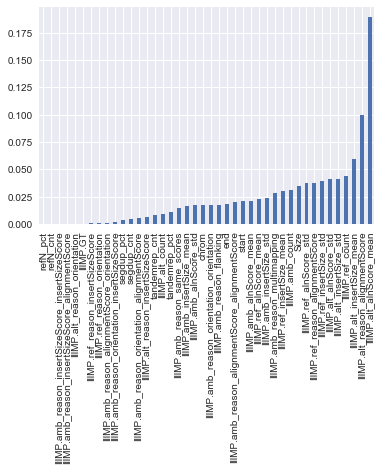

In [21]:
%matplotlib inline
feature_importances = pd.Series(model.feature_importances_, index=X_test.columns)
feature_importances.sort()
feature_importances.plot.bar()

In [22]:
#TODO: Try training the model with the most important features and note difference in overal model prediction score

In [23]:
#NOTE: Training Set - Show number of Hom Ref, Hom Var, Het Var datapoints the model was trained on
ytrain = pd.DataFrame()
ytrain['ytrain'] = y_train
pd.value_counts(ytrain['ytrain'].values, sort=False)

1.0    316
2.0     91
0.0    548
dtype: int64

In [24]:
model.predict(X_test)

array([ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  2.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  0.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  1.,  1.,  0.,
        0.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1

In [25]:
pred = model.predict(X_test)

In [26]:
print('Precision score of the training subset: {:.3f}'.format(precision_score(pred, y_test, average='micro'))) 

Precision score of the training subset: 0.823


In [27]:
# Add original labels and predicted labels back to the original dataframe
df_Xtest = pd.DataFrame(X_test)
df_Xtest.head()

,IllMP.GT,IllMP.alt_alnScore_mean,IllMP.alt_alnScore_std,IllMP.alt_count,IllMP.alt_insertSize_mean,IllMP.alt_insertSize_std,IllMP.alt_reason_alignmentScore,IllMP.alt_reason_insertSizeScore,IllMP.alt_reason_orientation,IllMP.amb_alnScore_mean,...,Size,chrom,end,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
18,-1.0,417.571429,45.465394,7.0,7124.571429,926.689940,7.0,0.0,0.0,360.548071,...,-64.0,1.0,94943297.0,0.0,0.0,0.0,0.0,94943232.0,0.0,0.000000
294,-1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,361.061003,...,-46.0,3.0,2923285.0,0.0,0.0,0.0,0.0,2923238.0,1.0,1.000000
1174,-1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,361.835888,...,-26.0,9.0,133016003.0,0.0,0.0,0.0,0.0,133015976.0,1.0,0.333333
1702,-1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,362.182269,...,-32.0,4.0,33863270.0,0.0,0.0,1.0,1.0,33863238.0,1.0,1.000000
512,-1.0,389.500000,47.484208,4.0,6861.250000,939.205349,4.0,0.0,0.0,355.435169,...,-20.0,9.0,80230639.0,0.0,0.0,0.0,0.0,80230618.0,1.0,1.000000


In [28]:
labels = pd.DataFrame(y_test)

In [29]:
df_Xtest['predicted_label'] = pred
df_Xtest['GTcons'] = df_train['GTcons']
df_Xtest['chrom'] = df_train['chrom']
df_Xtest['start'] = df_train['start']
df_Xtest['end'] = df_train['end']
# df_Xtest['Y_test'] = labels

In [30]:
pd.value_counts(df_Xtest['GTcons'].values, sort=False)

0    343
1    205
2     44
dtype: int64

In [31]:
pd.value_counts(df_Xtest['predicted_label'].values, sort=False)

1.0    228
0.0    346
2.0     18
dtype: int64

In [32]:
from sklearn.metrics import confusion_matrix
ytest = df_Xtest['GTcons']
predict = df_Xtest['predicted_label']
print(confusion_matrix(ytest, predict))

[[314  27   2]
 [ 26 168  11]
 [  6  33   5]]


In [33]:
pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,2.0,All
True,,,,
0,314,27,2,343
1,26,168,11,205
2,6,33,5,44
All,346,228,18,592


In [34]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predict))

             precision    recall  f1-score   support

          0       0.91      0.92      0.91       343
          1       0.74      0.82      0.78       205
          2       0.28      0.11      0.16        44

avg / total       0.80      0.82      0.81       592



***
Predict
***

** Load Data **

In [35]:
X2 = df_test

** Impute missing values using KNN **

In [36]:
#Convert dataframe to matrix
X2=X2.as_matrix()

#Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/3504 with 1 missing, elapsed time: 3.707
Imputing row 101/3504 with 1 missing, elapsed time: 3.714
Imputing row 201/3504 with 1 missing, elapsed time: 3.721
Imputing row 301/3504 with 1 missing, elapsed time: 3.730
Imputing row 401/3504 with 2 missing, elapsed time: 3.738
Imputing row 501/3504 with 1 missing, elapsed time: 3.745
Imputing row 601/3504 with 1 missing, elapsed time: 3.753
Imputing row 701/3504 with 1 missing, elapsed time: 3.760
Imputing row 801/3504 with 2 missing, elapsed time: 3.768
Imputing row 901/3504 with 1 missing, elapsed time: 3.776
Imputing row 1001/3504 with 2 missing, elapsed time: 3.783
Imputing row 1101/3504 with 2 missing, elapsed time: 3.791
Imputing row 1201/3504 with 2 missing, elapsed time: 3.799
Imputing row 1301/3504 with 1 missing, elapsed time: 3.807
Imputing row 1401/3504 with 2 missing, elapsed time: 3.816
Imputing row 1501/3504 with 1 missing, elapsed time: 3.824
Imputing row 1601/3504 with 2 missing, elapsed time: 3.831
Imputing 

In [37]:
dftest_header = list(df_test.columns.values)
X2.columns = dftest_header
X2.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,IllMP.amb_reason_orientation_orientation,IllMP.amb_reason_same_scores,IllMP.ref_alnScore_mean,IllMP.ref_alnScore_std,IllMP.ref_count,IllMP.ref_insertSize_mean,IllMP.ref_insertSize_std,IllMP.ref_reason_alignmentScore,IllMP.ref_reason_insertSizeScore,IllMP.ref_reason_orientation
0,4.0,95498964.0,95499280.0,-316.0,0.0,0.0,0.0,0.0,1.0,0.117089,...,33.0,416.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,19.0,14399929.0,14399954.0,-24.0,0.0,0.0,1.0,1.0,1.0,1.000000,...,33.0,349.0,454.500000,44.057349,10.0,6390.900000,1357.778071,10.0,0.0,0.0
2,8.0,76766532.0,76766569.0,-36.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,41.0,405.0,417.857143,69.484692,7.0,6443.714286,1479.133309,7.0,0.0,0.0


In [38]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,IllMP.amb_reason_orientation_orientation,IllMP.amb_reason_same_scores,IllMP.ref_alnScore_mean,IllMP.ref_alnScore_std,IllMP.ref_count,IllMP.ref_insertSize_mean,IllMP.ref_insertSize_std,IllMP.ref_reason_alignmentScore,IllMP.ref_reason_insertSizeScore,IllMP.ref_reason_orientation
0,4.0,95498964.0,95499280.0,-316.0,0.0,0.0,0.0,0.0,1.0,0.117089,...,33.0,416.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,19.0,14399929.0,14399954.0,-24.0,0.0,0.0,1.0,1.0,1.0,1.000000,...,33.0,349.0,454.500000,44.057349,10.0,6390.900000,1357.778071,10.0,0.0,0.0
2,8.0,76766532.0,76766569.0,-36.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,41.0,405.0,417.857143,69.484692,7.0,6443.714286,1479.133309,7.0,0.0,0.0


In [39]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

In [40]:
model.predict(X5)

array([ 1.,  0.,  1., ...,  1.,  0.,  0.])

In [41]:
pred = model.predict(X5)

In [42]:
X5['predicted_label'] = pred
X5['chrom'] = df_test_2['chrom']
X5['start'] = df_test_2['start']
X5['end'] = df_test_2['end']
X5['Size'] = df_test_2['Size']
X5['GTcons'] = df_test_2['GTcons']
X5['GTsupp'] = df_test_2['GTsupp']

In [43]:
X5.head(3)

,IllMP.GT,IllMP.alt_alnScore_mean,IllMP.alt_alnScore_std,IllMP.alt_count,IllMP.alt_insertSize_mean,IllMP.alt_insertSize_std,IllMP.alt_reason_alignmentScore,IllMP.alt_reason_insertSizeScore,IllMP.alt_reason_orientation,IllMP.amb_alnScore_mean,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
0,-1.0,424.928571,66.444890,14.0,7052.785714,1142.254924,14.0,0.0,0.0,358.688010,...,0.0,0.0,0.0,0.0,95498964,1.0,0.117089,1.0,2,1
1,-1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,376.872993,...,0.0,0.0,1.0,1.0,14399929,1.0,1.000000,0.0,1,1
2,-1.0,393.000000,67.091977,6.0,6575.166667,992.408588,6.0,0.0,0.0,365.164044,...,0.0,0.0,0.0,0.0,76766532,0.0,0.000000,1.0,1,2


***
Label Analysis
***

In [44]:
df_new = pd.DataFrame()
df_new['true'] = df_test_2['GTcons'].astype(float)
df_new['predicted'] = pred
df_new['predicted'] = df_new['predicted'].astype(float)

In [45]:
pd.value_counts(df_new['true'].values, sort=False)

2.0     671
1.0    1912
0.0     921
dtype: int64

In [46]:
pd.value_counts(df_new['predicted'].values, sort=False)

1.0    2201
0.0    1173
2.0     130
dtype: int64

In [47]:
# Calculate Precision Score
true = df_new['true']
predicted = df_new['predicted']
print('Precision score of the test subset: {:.3f}'.format(precision_score(true, predicted, average='micro'))) 

Precision score of the test subset: 0.701


In [48]:
pd.crosstab(true, predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,2.0,All
True,,,,
0.0,842,76,3,921
1.0,306,1547,59,1912
2.0,25,578,68,671
All,1173,2201,130,3504


#### Crowdsourced (Crowdvariant) Results
![Figure1](https://raw.githubusercontent.com/lesleymaraina/NIST/master/Notebooks/SVanalyzer_ML/DEL/images/PB_CrowdVar.png)

** Exact Match **

In [65]:
em = X5['predicted_label'] == 1.0
exact_match = X5[em]

In [66]:
exact_match.head(1)

,Size,chrom,end,pacbio.GT,pacbio.alt_alnScore_mean,pacbio.alt_alnScore_std,pacbio.alt_count,pacbio.alt_insertSize_mean,pacbio.alt_insertSize_std,pacbio.alt_reason_alignmentScore,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
0,-316,4,95499280,2.0,15367.42,5716.953952,50.0,9848.62,3591.556375,50.0,...,0.0,0.0,0.0,0.0,95498964,1.0,0.117089,1.0,2,1


In [67]:
output_notebook()
p = figure()
p = Histogram(exact_match, values='GTcons', title='Exact_Match_HG002: Consensust GT', color='LightSlateGray', bins=15, plot_height=250, xlabel="GTcons", ylabel="Frequency")
show(p)

Loading BokehJS ...

** Homozygous Reference **

In [68]:
hr = X5['predicted_label'] == 0.0
hom_ref = X5[hr]
hom_ref.head(1)

,Size,chrom,end,pacbio.GT,pacbio.alt_alnScore_mean,pacbio.alt_alnScore_std,pacbio.alt_count,pacbio.alt_insertSize_mean,pacbio.alt_insertSize_std,pacbio.alt_reason_alignmentScore,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
17,-364,17,79611415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,79610354,5.0,0.150801,0.0,0,1


In [69]:
output_notebook()
p = figure()
p = Histogram(hom_ref, values='GTcons', title='Homozygous_Reference_HG002: Consensust GT', color='LightSlateGray', bins=15, plot_height=250, xlabel="GTcons", ylabel="Frequency")
show(p)

Loading BokehJS ...

** Inaccurate Call **

In [70]:
ic = X5['predicted_label'] == 2.0
inac_call = X5[ic]
inac_call.head(1)

,Size,chrom,end,pacbio.GT,pacbio.alt_alnScore_mean,pacbio.alt_alnScore_std,pacbio.alt_count,pacbio.alt_insertSize_mean,pacbio.alt_insertSize_std,pacbio.alt_reason_alignmentScore,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
5,-338,X,149551473,2.0,17543.04545,5121.635308,22.0,11154.95455,3394.049318,22.0,...,0.0,0.0,0.0,0.0,149551135,1.0,0.16568,2.0,2,1


In [71]:
output_notebook()
p = figure()
p = Histogram(inac_call, values='GTcons', title='Inaccurate_Call_HG002: Consensust GT', color='LightSlateGray', bins=15, plot_height=250, xlabel="GTcons", ylabel="Frequency")
show(p)

Loading BokehJS ...